Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header = 1 )

In [4]:
dataset.info()

<class 'pandas.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   day          246 non-null    str  
 1   month        245 non-null    str  
 2   year         245 non-null    str  
 3   Temperature  245 non-null    str  
 4    RH          245 non-null    str  
 5    Ws          245 non-null    str  
 6   Rain         245 non-null    str  
 7   FFMC         245 non-null    str  
 8   DMC          245 non-null    str  
 9   DC           245 non-null    str  
 10  ISI          245 non-null    str  
 11  BUI          245 non-null    str  
 12  FWI          245 non-null    str  
 13  Classes      244 non-null    str  
dtypes: str(14)
memory usage: 27.0 KB


## Cleaning Data

In [5]:
# Missing Values
dataset.isnull().sum()
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
# Converting the region the records belongs to as an new feature and assign a label to each region
dataset.loc[:122,"region"] =0
dataset.loc[122:,"region"] =1
df = dataset

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    str    
 1   month        245 non-null    str    
 2   year         245 non-null    str    
 3   Temperature  245 non-null    str    
 4    RH          245 non-null    str    
 5    Ws          245 non-null    str    
 6   Rain         245 non-null    str    
 7   FFMC         245 non-null    str    
 8   DMC          245 non-null    str    
 9   DC           245 non-null    str    
 10  ISI          245 non-null    str    
 11  BUI          245 non-null    str    
 12  FWI          245 non-null    str    
 13  Classes      244 non-null    str    
 14  region       246 non-null    float64
dtypes: float64(1), str(14)
memory usage: 29.0 KB


In [8]:
# changing the region type to int
df[['region']]=df[['region']].astype(int)

In [9]:
# Deleting the null record
df=df.dropna().reset_index(drop=True)

In [10]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [11]:
# Dropping the repeated row 
df=df.drop(122).reset_index(drop=True)


In [12]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='str')

In [13]:
# Fixing the columns
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='str')

In [14]:
# Changing the datatype of columns as per the data
df[['day', 'month', 'year', 'Temperature','RH']] = df[['day', 'month', 'year', 'Temperature','RH']].astype(int)
# general way 
objects=[features for features in df.columns if df[features].dtypes == 'str']

In [15]:
objects

['Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [16]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [17]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    str    
 14  region       243 non-null    int64  
dtypes: float64(8), int64(6), str(1)
memory usage: 28.6 KB


In [18]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [19]:
# save this clean dataset
df.to_csv('Algerian_fire_clean_dataset.csv')

## EDA

In [20]:
dfc = df.drop(['day','month','year'],axis =1)

In [21]:
# Encoding the categorical column
dfc['Classes'] = np.where(dfc['Classes'].str.contains('not fire'),0,1)

In [22]:
#Categrories in Classes columns
dfc['Classes'].value_counts()


Classes
1    137
0    106
Name: count, dtype: int64

In [23]:
dfc.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [24]:
dfc['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

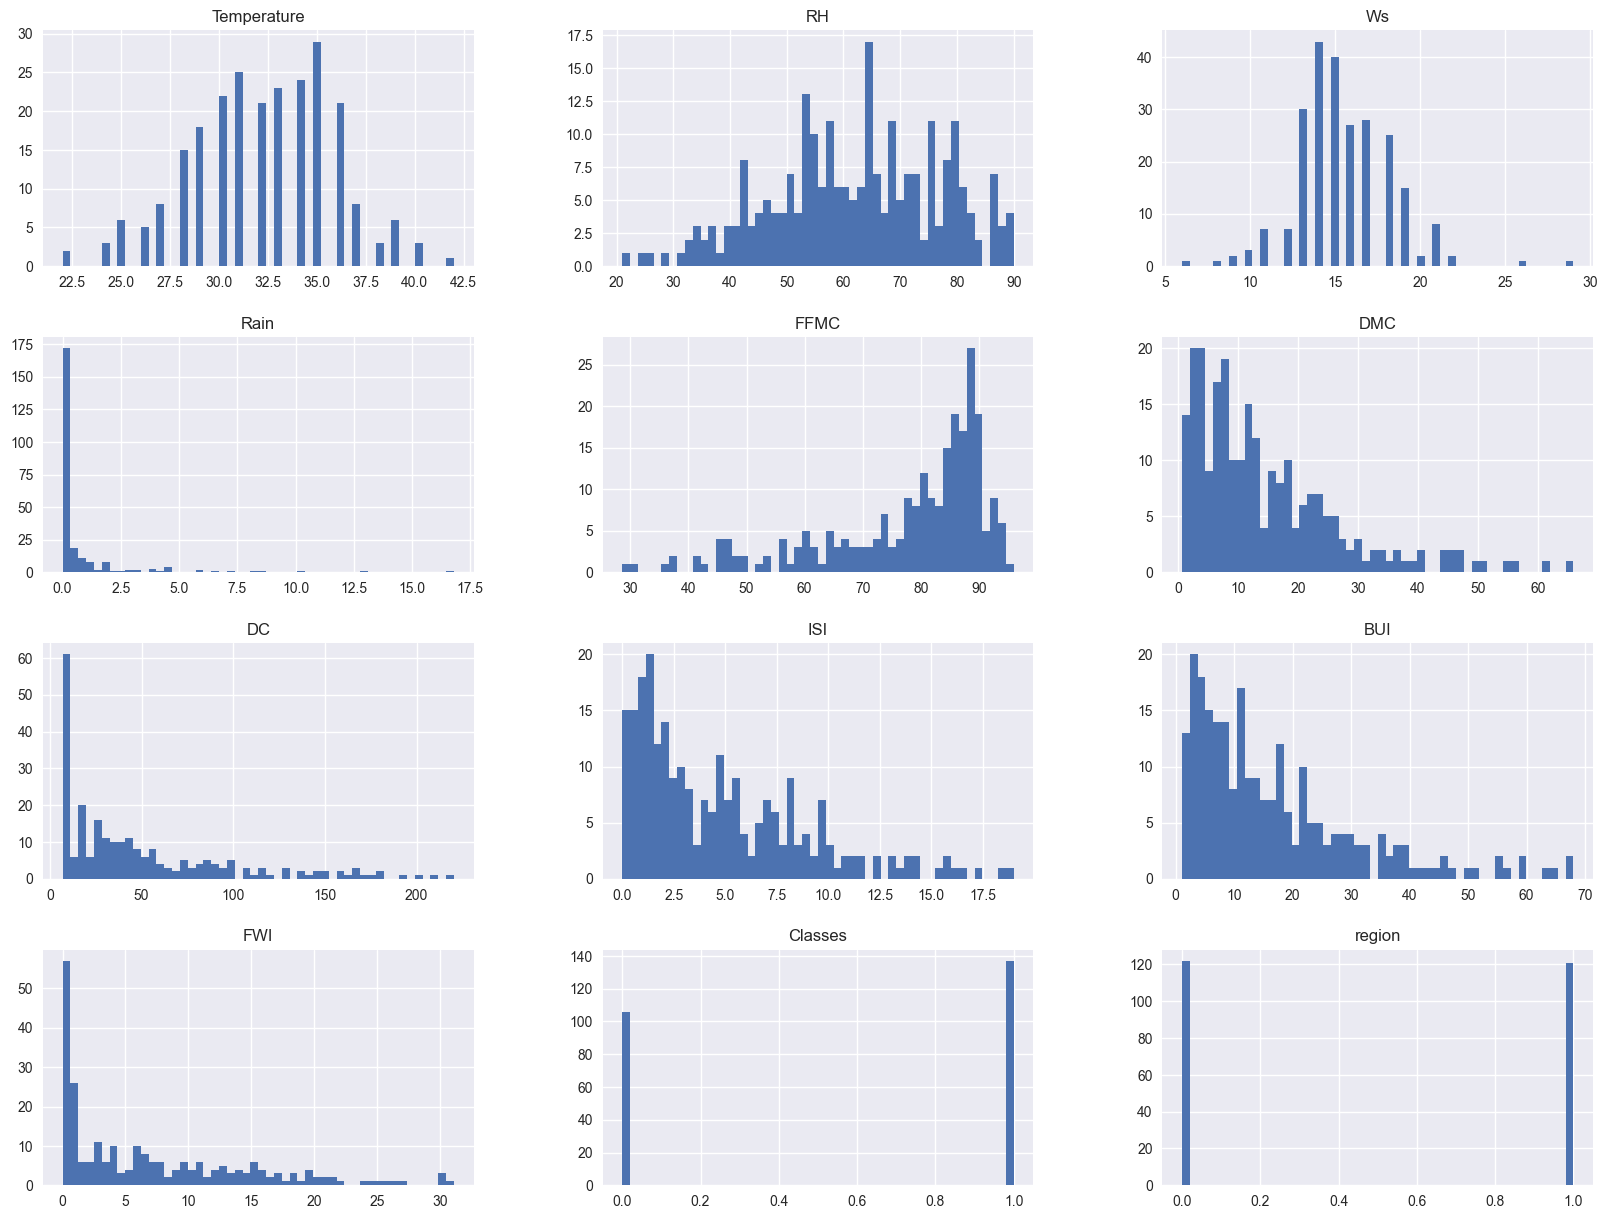

In [25]:
# Plot density plot for all features
plt.style.use('seaborn-v0_8')
dfc.hist(bins=50,figsize=(20,15))
plt.show()

In [26]:
percentage = dfc['Classes'].value_counts(normalize=True)*100

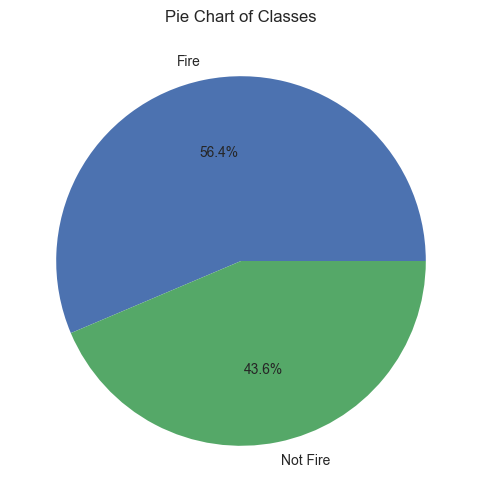

In [27]:
## Plotting the pie chart 

classlabels = ['Fire','Not Fire']
plt.figure(figsize=(12,6))
plt.pie(percentage,labels = classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

In [28]:
# Correletion
dfc.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

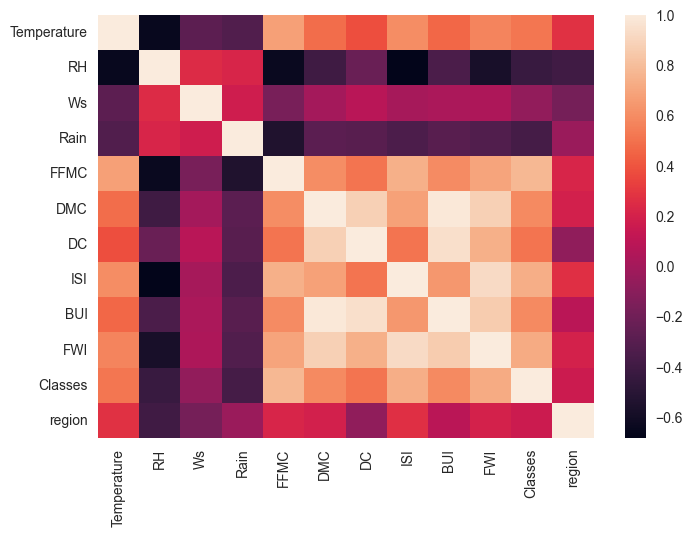

In [29]:
sns.heatmap(dfc.corr())

<Axes: xlabel='FWI'>

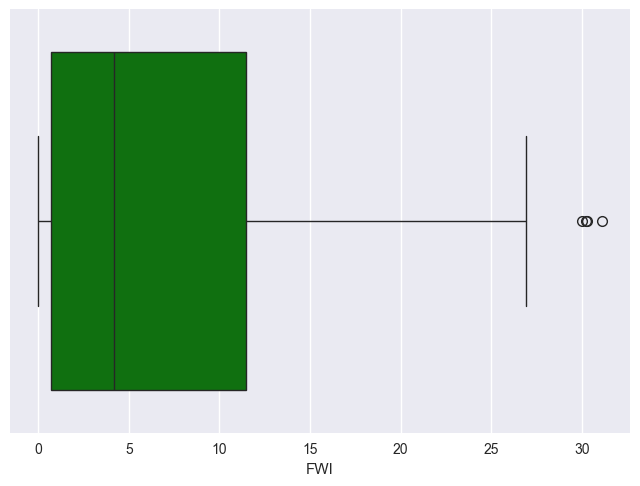

In [30]:
# Box Plot
sns.boxplot(df['FWI'],color='g',orient='h')

Text(0.5, 1.0, 'Fire Analysis of Bejaia Region')

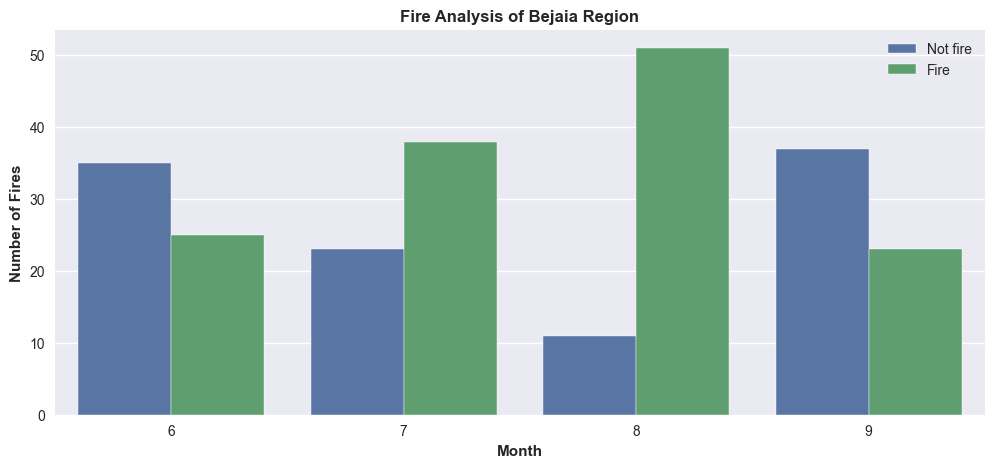

In [31]:
dftemp=df.loc[df['region']==0]
plt.subplots(figsize=(12,5))
sns.set_style('whitegrid')
sns.countplot(x=df['month'],hue=dfc['Classes'])
plt.legend(labels=['Not fire','Fire'])
plt.xlabel('Month',weight='bold')
plt.ylabel('Number of Fires',weight='bold')
plt.title('Fire Analysis of Bejaia Region',weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Bejaia Region')

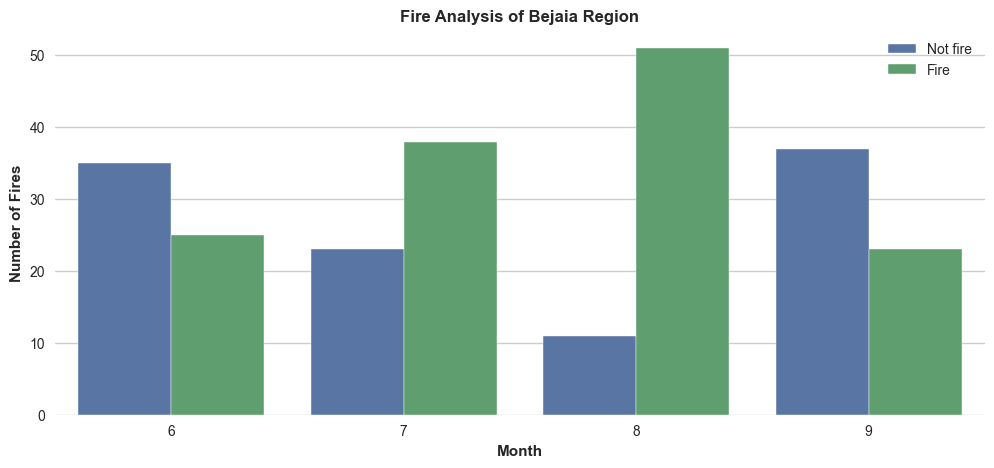

In [32]:
dftemp=df.loc[df['region']==1]
plt.subplots(figsize=(12,5))
sns.set_style('whitegrid')
sns.countplot(x=df['month'],hue=dfc['Classes'])
plt.legend(labels=['Not fire','Fire'])
plt.xlabel('Month',weight='bold')
plt.ylabel('Number of Fires',weight='bold')
plt.title('Fire Analysis of Bejaia Region',weight='bold')

Observations
* Highest number of fire happens in the august.
* Mostly fire happens in the month of june, jul, august and september.
* Less fire in september.

# Model Training

In [33]:
## Independent and dependent features
X = dfc.drop('FWI',axis=1)
y =dfc['FWI']

In [34]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [35]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [36]:
## Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [37]:
# Feature selection using correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

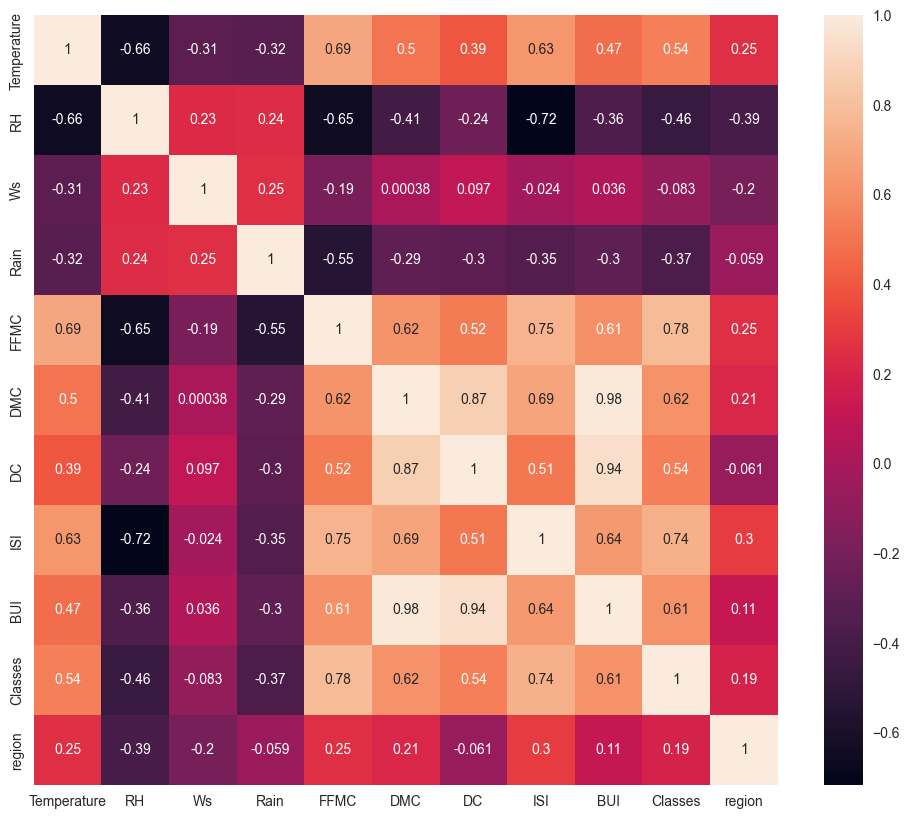

In [38]:
# Check for multicollinearity independent feature should not be much corr
plt.figure(figsize=(12,10))
corr =X_train.corr()
sns.heatmap(corr, annot=True)


In [39]:
# Selecting the highly correlated columns based on threshold
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: # To handle both +ve and -ve value and threshold is given by domain expert
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [40]:
cor_features=correlation(X_train,0.85)

In [41]:
# Droping the feature when correlation is more than  0.85
X_train.drop(cor_features,axis=1,inplace=True)
X_test.drop(cor_features,axis=1,inplace=True)
X_train.shape,X_test.shape


((182, 9), (61, 9))

In [42]:
# Feature Scaling or standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

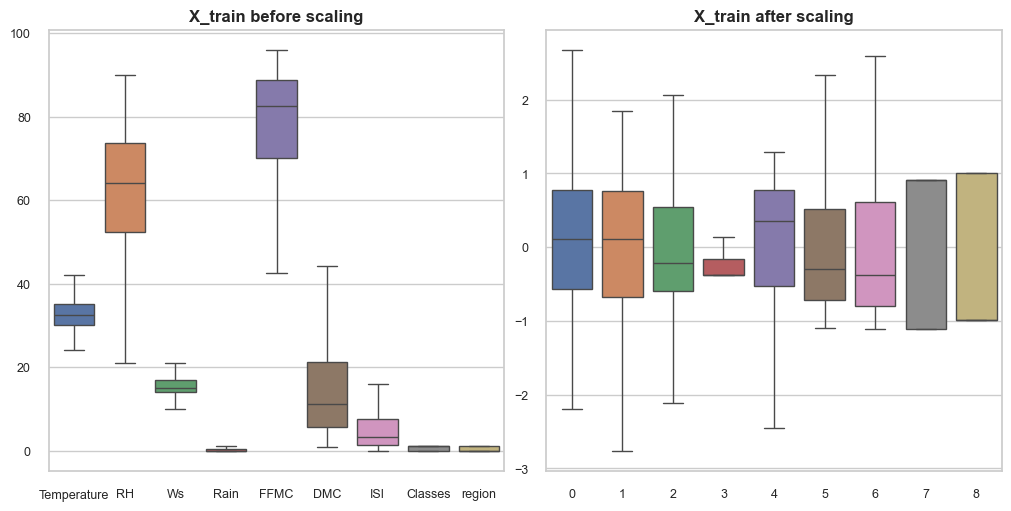

In [43]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# Before scaling
sns.boxplot(
    data=X_train,
    ax=axes[0],
    orient="v",
    showfliers=False
)
axes[0].set_title("X_train before scaling", weight="bold")
axes[0].tick_params(labelsize=9)

# After scaling
sns.boxplot(
    data=X_train_scale,
    ax=axes[1],
    orient="v",
    showfliers=False
)
axes[1].set_title("X_train after scaling", weight="bold")
axes[1].tick_params(labelsize=9)

plt.show()

## Model Training


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg =LinearRegression()
linreg.fit(X_train_scale,y_train)
y_pred = linreg.predict(X_test_scale)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae*100)
print("R2 Score",score*100)

Mean Absolute Error 54.682364652499786
R2 Score 98.47657384266951


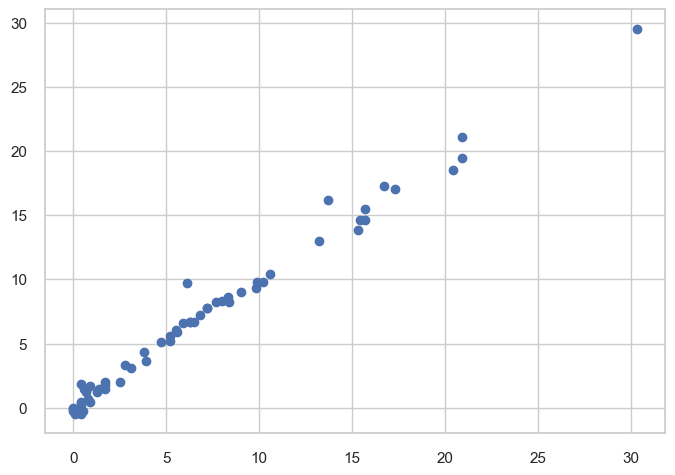

In [ ]:
plt.scatter(y_test,y_pred,)

### Lasso Regression

In [48]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso =Lasso()
lasso.fit(X_train_scale,y_train)
y_pred = lasso.predict(X_test_scale)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae*100)
print("R2 Score",score*100)

Mean Absolute Error 113.31759949144087
R2 Score 94.92020263112389


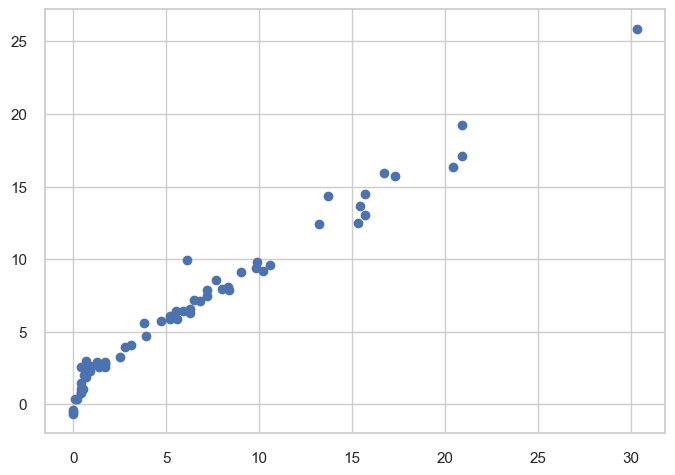

In [49]:
plt.scatter(y_test,y_pred,)

### Ridge Regression

In [50]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scale,y_train)
y_pred = ridge.predict(X_test_scale)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae*100)
print("R2 Score",score*100)

Mean Absolute Error 56.42305340105715
R2 Score 98.42993364555512


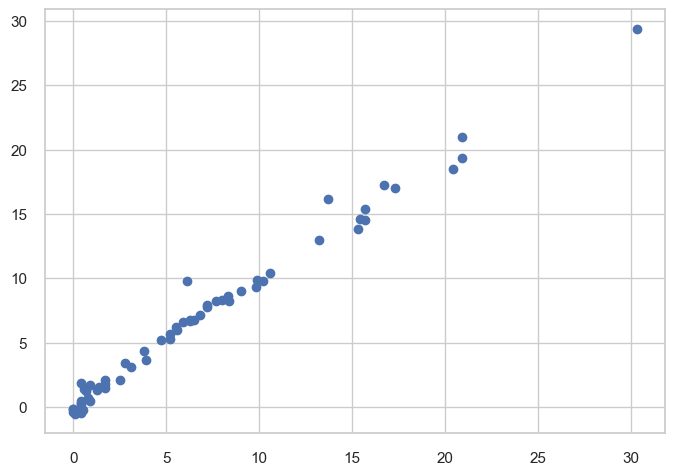

In [51]:
plt.scatter(y_test,y_pred,)

### Elasticnet Regression

In [52]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic =ElasticNet()
elastic.fit(X_train_scale,y_train)
y_pred = elastic.predict(X_test_scale)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae*100)
print("R2 Score",score*100)

Mean Absolute Error 188.22353634895998
R2 Score 87.53460589519703


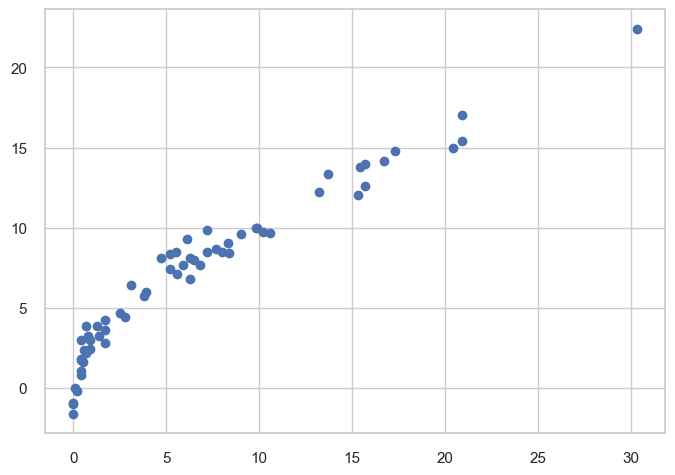

In [53]:
plt.scatter(y_test,y_pred,)

## Cross Validation Lasso

In [54]:
from sklearn.linear_model import LassoCV
lassocv =LassoCV(cv=5)
lassocv.fit(X_train_scale,y_train)
y_pred = lassocv.predict(X_test_scale)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error",mae*100)
print("R2 Score",score*100)

Mean Absolute Error 63.58894638564663
R2 Score 98.14406737205228


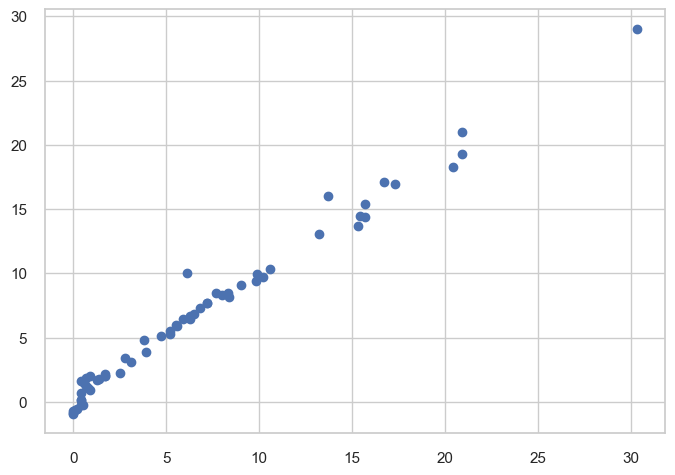

In [55]:
plt.scatter(y_test,y_pred,)